In [110]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams["figure.figsize"] = (15,10)

In [111]:
df = pd.read_csv(r"C:\Users\Evan\Desktop\Capstone Project\Crime_Data_2019.csv", parse_dates=['DATE_REPORTED', 'DATE_OCCURED'], index_col=0)

In [112]:
df['DAY'] = df.DATE_OCCURED.dt.strftime('%A') #Determine the day of the week for each crime occurence

In [113]:
df['ZIP_CODE'] = pd.Categorical(df.ZIP_CODE) #Change zip code to a categorical variable

In [114]:
df['Time_Difference'] = (df.DATE_REPORTED - df.DATE_OCCURED).dt.total_seconds() / 60 #create a variable for the difference between the time the crime was reported and the time the crime was committed (in minutes)

In [115]:
df.head() #Quick look at the data structure

,DATE_REPORTED,DATE_OCCURED,UOR_DESC,CRIME_TYPE,NIBRS_CODE,UCR_HIERARCHY,ATT_COMP,LMPD_DIVISION,LMPD_BEAT,PREMISE_TYPE,BLOCK_ADDRESS,CITY,ZIP_CODE,ID,DAY,Time_Difference
INCIDENT_NUMBER,,,,,,,,,,,,,,,,
80-19-042716,2019-06-12 17:15:00,2019-06-10 14:45:00,MISSING PERSONS,OTHER,90Z,PART II,COMPLETED,8TH DIVISION,815,RESIDENCE / HOME,1700 BLOCK TELLURIDE WAY ...,LOUISVILLE,40223.0,1237938,Monday,3030.0
80-19-038764,2019-05-29 21:05:00,2019-05-29 21:00:00,ASSAULT - 4TH DEGREE (DOMESTIC VIOLENCE) MINOR...,ASSAULT,13B,PART II,COMPLETED,2ND DIVISION,223,OTHER RESIDENCE (APARTMENT/CONDO),1600 BLOCK GARLAND AVE ...,LOUISVILLE,40210.0,1237939,Wednesday,5.0
80-19-041899,2019-06-09 23:12:00,2019-06-09 23:12:00,POSS OF MARIJUANA,DRUGS/ALCOHOL VIOLATIONS,35A,PART II,COMPLETED,4TH DIVISION,423,RESIDENCE / HOME,3700 BLOCK LENTZ AVE ...,LOUISVILLE,40215.0,1237940,Sunday,0.0
80-19-042099,2019-06-10 18:29:00,2018-07-14 09:30:00,ASSAULT - 4TH DEGREE (DOMESTIC VIOLENCE) MINOR...,ASSAULT,13B,PART II,COMPLETED,8TH DIVISION,812,RESIDENCE / HOME,2300 BLOCK THORNHILL RD ...,LOUISVILLE,40222.0,1237941,Saturday,477179.0
80-19-040327,2019-06-04 12:00:00,2019-06-04 11:56:00,TERRORISTIC THREATENING 3RD DEGREE,ASSAULT,13C,PART II,COMPLETED,3RD DIVISION,334,RESIDENCE / HOME,4600 BLOCK CLAYTON TER ...,LOUISVILLE,40214.0,1237942,Tuesday,4.0


In [116]:
df_immediate = df.loc[(df.Time_Difference == 0)] #Select cases where the time difference is 0 minutes

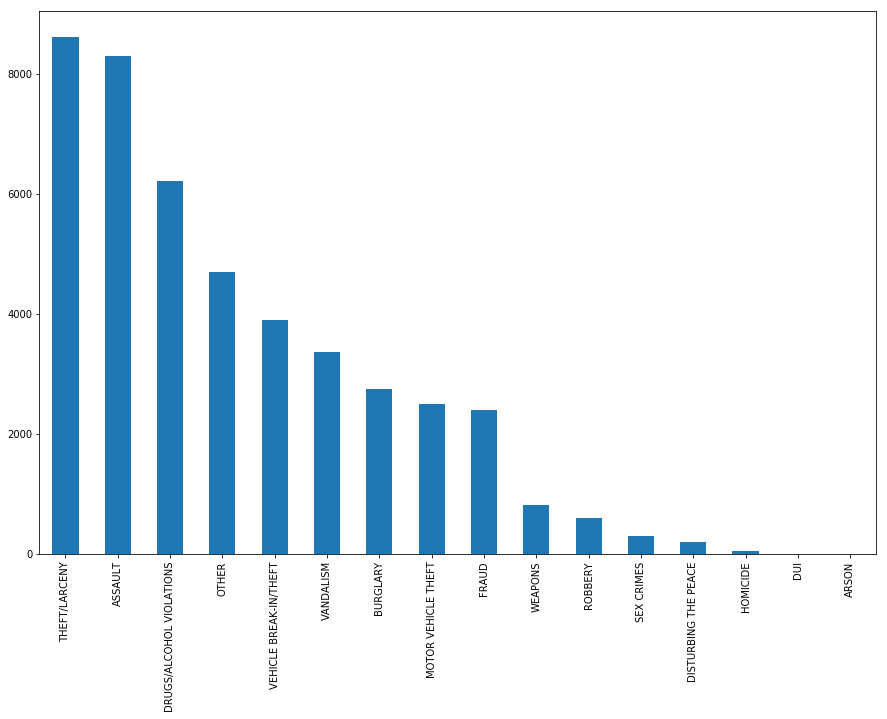

In [117]:
df['CRIME_TYPE'].value_counts().plot(kind='bar')

The relative frequencies of each type of reported crime.

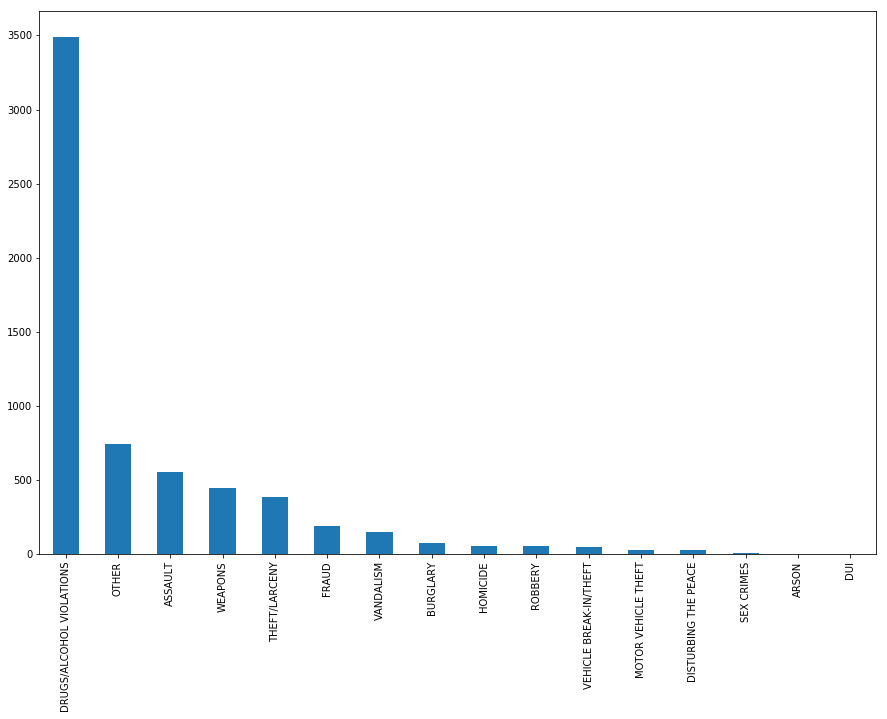

In [118]:
df_immediate['CRIME_TYPE'].value_counts().plot(kind='bar')

These crimes were likely observed by police on patrol, as the the crime was reported at the same time it was observed. Notice the prevalence of Drug/Alcohol Violations.

In [119]:
df_recent = df.loc[(df.Time_Difference < 15) & (df.Time_Difference > 0)] #Select cases where the time difference is between 0 and 15 minutes.

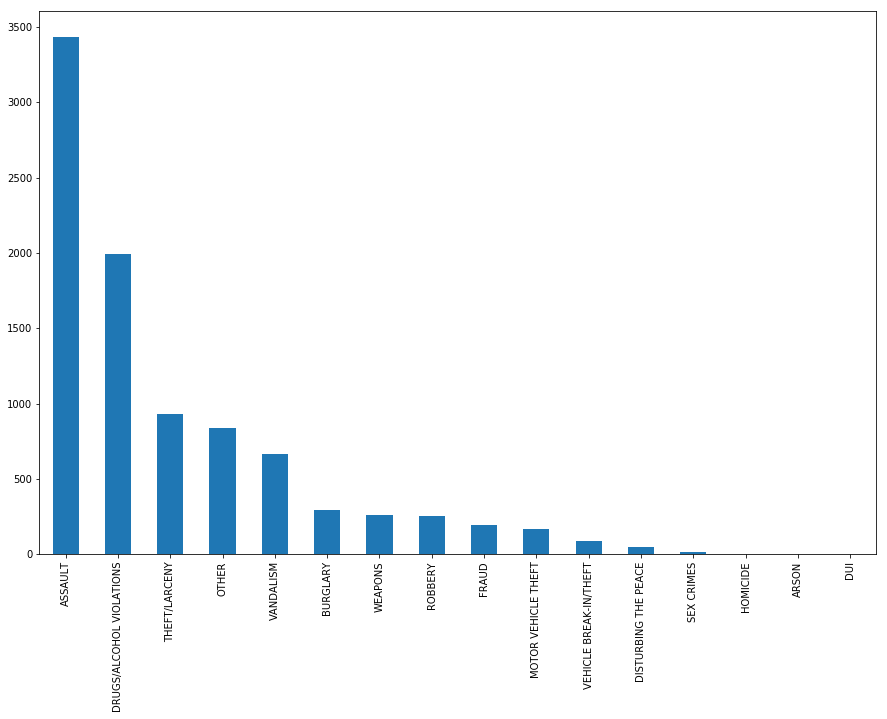

In [120]:
df_recent['CRIME_TYPE'].value_counts().plot(kind='bar')

These crimes were likely reported by witnesses or victims within 15 minutes of the crime occuring. Notice that Assault is now the most frequent type of crime. These crimes are likely to benefit most from a quick response time. All further analyses will look at these cases.

In [121]:
df_assaults = df_recent.loc[(df_recent.CRIME_TYPE == 'ASSAULT')]

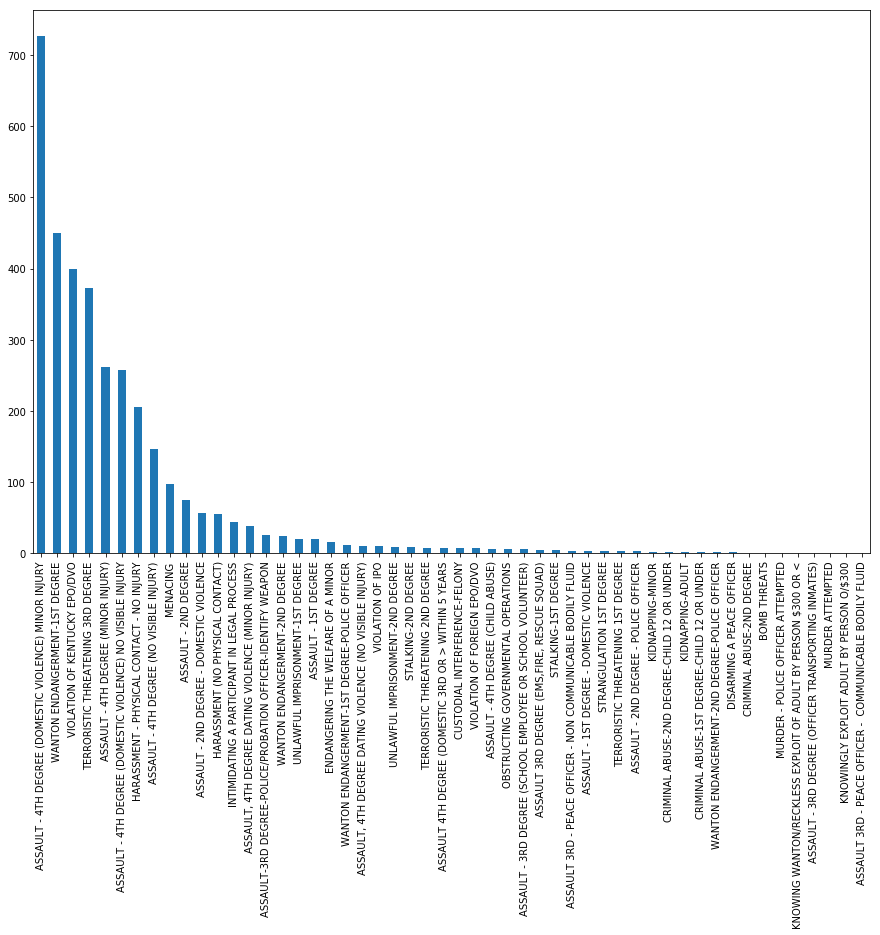

In [122]:
df_assaults['UOR_DESC'].value_counts().plot(kind='bar')

Uniform Offense Codes for all Assaults reported within 15 minutes.

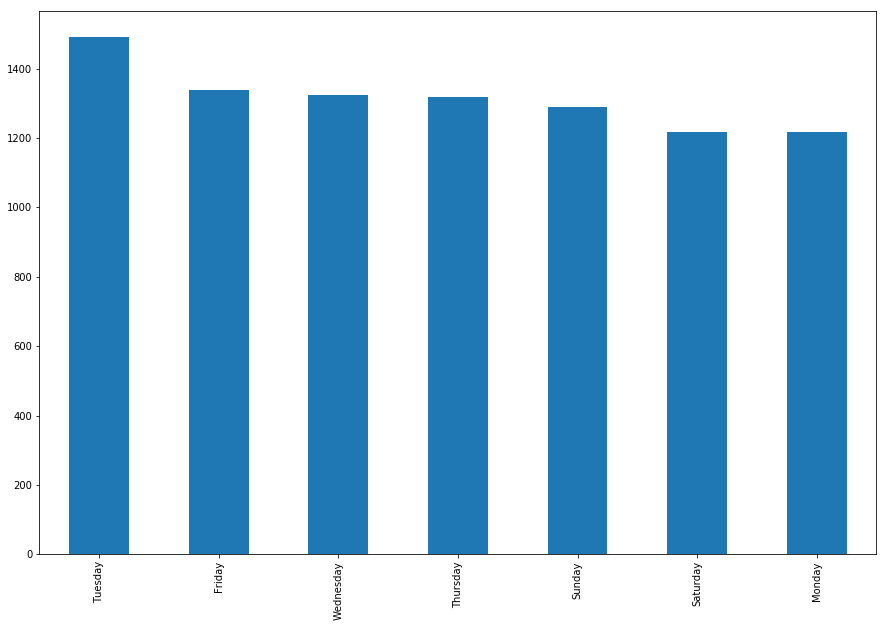

In [123]:
df_recent['DAY'].value_counts().plot(kind='bar')

Tuesday has the highest number of crimes reported within 15 minutes.

In [124]:
monday = df_recent.loc[df_recent.DAY == 'Monday']
tuesday = df_recent.loc[df_recent.DAY == 'Tuesday']
wednesday = df_recent.loc[df_recent.DAY == 'Wednesday']
thursday = df_recent.loc[df_recent.DAY == 'Thursday']
friday = df_recent.loc[df_recent.DAY == 'Friday']
saturday = df_recent.loc[df_recent.DAY == 'Saturday']
sunday = df_recent.loc[df_recent.DAY == 'Sunday']

<function matplotlib.pyplot.show(*args, **kw)>

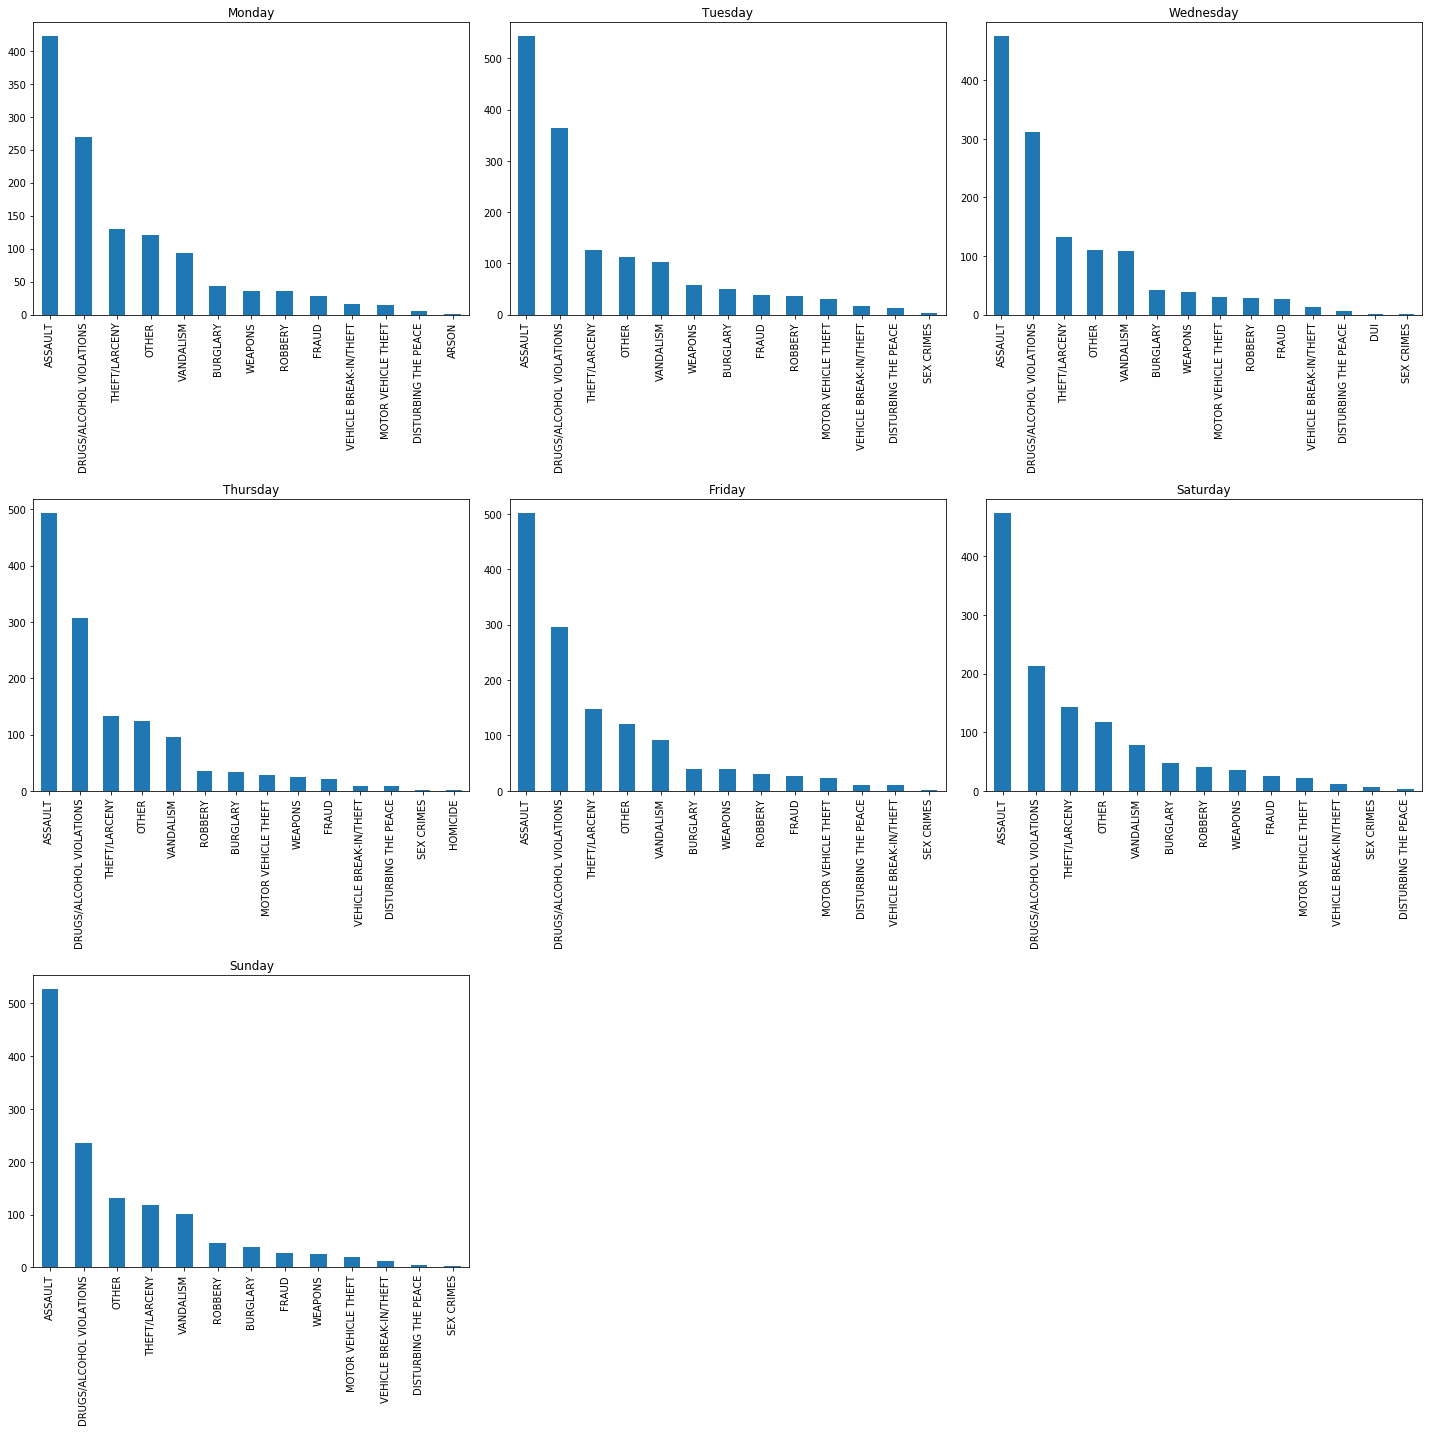

In [125]:
plt.rcParams["figure.figsize"] = (20,20)

plt.subplot(3, 3, 1)
monday['CRIME_TYPE'].value_counts().plot(kind='bar', title='Monday')

plt.subplot(3, 3, 2)
tuesday['CRIME_TYPE'].value_counts().plot(kind='bar', title='Tuesday')

plt.subplot(3, 3, 3)
wednesday['CRIME_TYPE'].value_counts().plot(kind='bar', title='Wednesday')

plt.subplot(3, 3, 4)
thursday['CRIME_TYPE'].value_counts().plot(kind='bar', title='Thursday')
                                           
plt.subplot(3, 3, 5)
friday['CRIME_TYPE'].value_counts().plot(kind='bar', title='Friday')
                                           
plt.subplot(3, 3, 6)
saturday['CRIME_TYPE'].value_counts().plot(kind='bar', title='Saturday')
                                           
plt.subplot(3, 3, 7)
sunday['CRIME_TYPE'].value_counts().plot(kind='bar', title='Sunday')

plt.tight_layout()
plt.show

Crime distributions are similar for each day of the week. On Sundays OTHER replaces THEFT/LARCENY as the third most frequent type of crime.

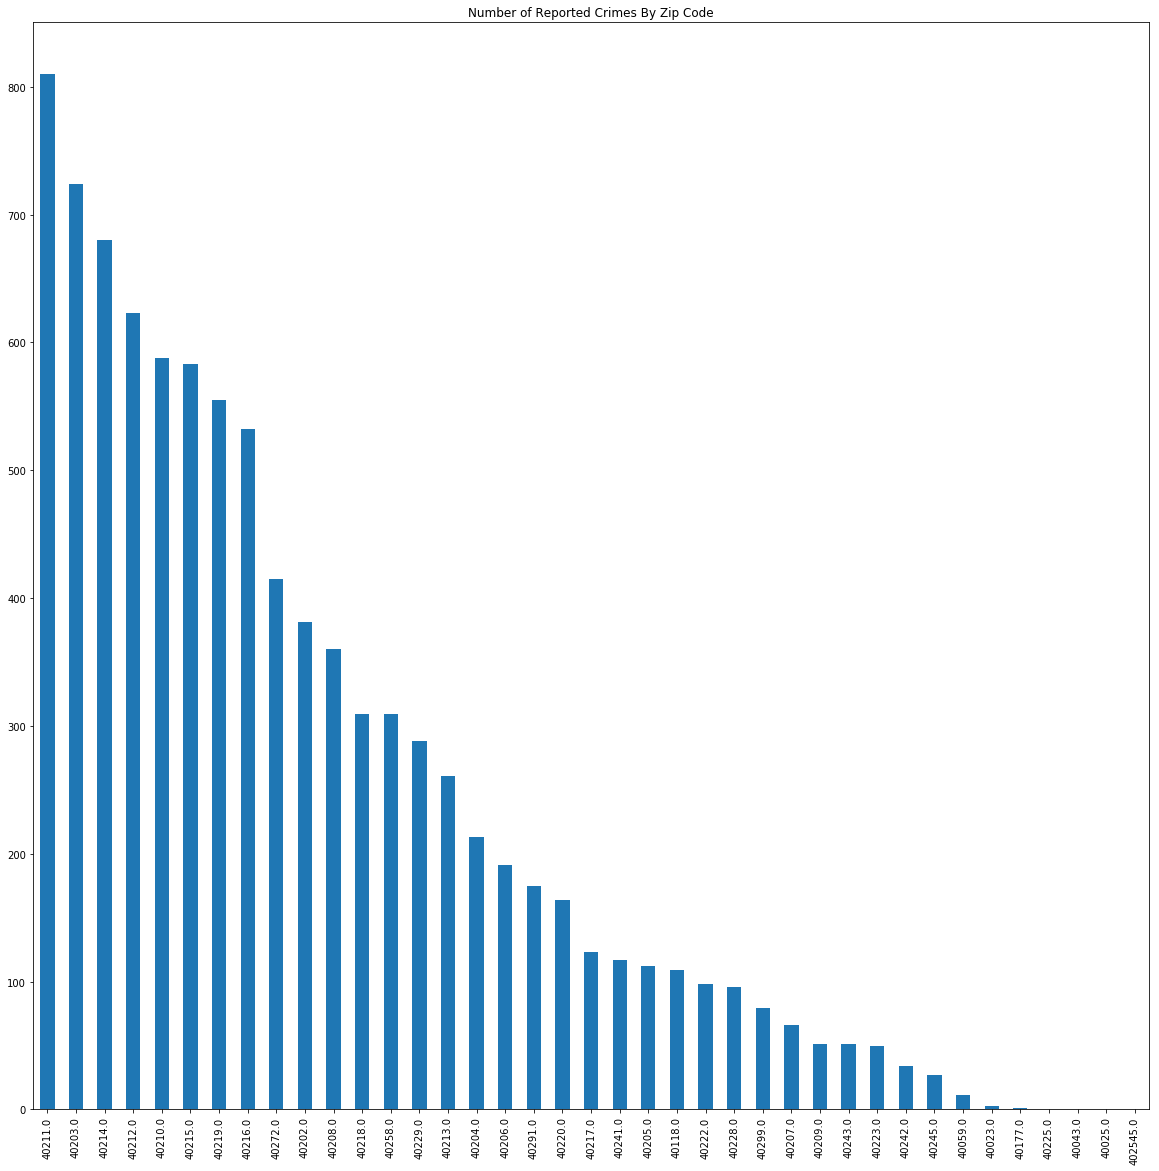

In [126]:
df_recent['ZIP_CODE'].value_counts().plot(kind='bar', title='Number of Reported Crimes By Zip Code')

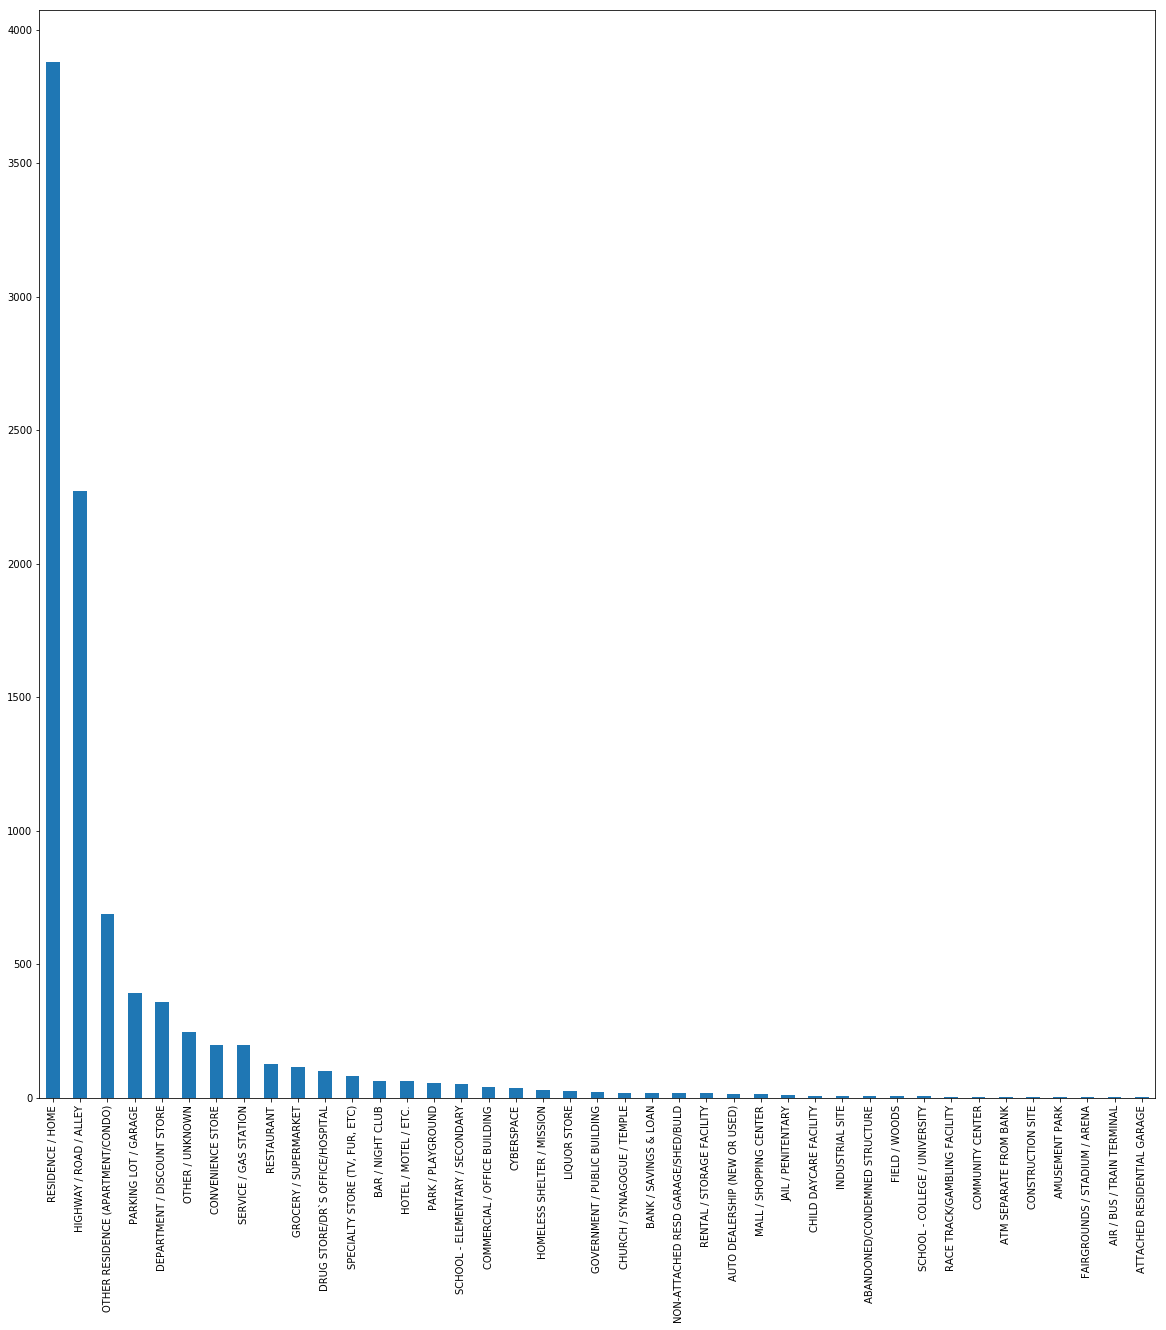

In [127]:
df_recent['PREMISE_TYPE'].value_counts().plot(kind='bar')